## <font color='blue'> Gaussian Processes </font>


A Gaussian Process (GP) is a probabilistic model used in machine learning and statistics, particularly for solving regression, classification, and optimization problems.

### <font color='blue'> Definition </font>
A Gaussian Process is a collection of random variables, any finite number of which have a joint Gaussian distribution. It is fully specified by its mean function and covariance function.

### <font color='blue'> Mean and Covariance Functions </font>
- **Mean Function** ($m(x)$): This function represents the expected value of the process at any point $x$. For simplicity, it is often assumed to be zero ($m(x) = 0$).
- **Covariance Function** ($k(x, x')$): This function defines the covariance between the values of the process at any two points $x$ and $x'$. It encodes assumptions about the function's properties, such as smoothness and periodicity.

### <font color='blue'> Mathematical Formulation </font>
A Gaussian Process is denoted as:
$$ f(x) \sim \mathcal{GP}(m(x), k(x, x')) $$
where $ f(x) $ is the function we are modeling, $ m(x) $ is the mean function, and $ k(x, x') $ is the covariance function.

### <font color='blue'> Key Properties </font>
1. **Non-parametric Nature**: GPs are non-parametric, meaning they can model a wide range of functions without assuming a specific form for the underlying function.
2. **Flexibility**: The choice of covariance function allows GPs to model various kinds of data behavior.
3. **Probabilistic Predictions**: GPs provide not only predictions but also uncertainty estimates, which are useful in many applications.

### <font color='blue'> Covariance Functions (Kernels) </font>
The choice of the covariance function is crucial as it determines the properties of the functions that the GP can model. Commonly used kernels include:
- **Squared Exponential (RBF) Kernel**:
  $$ k(x, x') = \sigma^2 \exp\left(-\frac{(x - x')^2}{2\ell^2}\right) $$
  where $\sigma^2$ is the variance and $\ell$ is the length scale.
- **Matern Kernel**:
  $$ k(x, x') = \frac{2^{1-\nu}}{\Gamma(\nu)}\left(\frac{\sqrt{2\nu}|x - x'|}{\ell}\right)^\nu K_\nu\left(\frac{\sqrt{2\nu}|x - x'|}{\ell}\right) $$
  where $\nu$ controls the smoothness and $K_\nu$ is a modified Bessel function.

### <font color='blue'> Conditional Expectation </font>

In a regression problem, we are often interested in estimating the expected value of the target variable $ y $ given the input features $ x $, which is denoted as $ \mathbb{E}[y | x] $. This is known as the conditional expectation.

### <font color='blue'> Gaussian Process Regression </font>

Gaussian Process Regression models the distribution over functions $ f(x) $ such that the observed data is a noisy realization of this function:
$$ y = f(x) + \epsilon $$
where $ \epsilon $ is the noise, typically assumed to be Gaussian with mean zero and variance $\sigma^2$.

A Gaussian Process is defined by a mean function $ m(x) $ and a covariance function (or kernel) $ k(x, x') $:
$$ f(x) \sim \mathcal{GP}(m(x), k(x, x')) $$

### <font color='blue'> Prediction in GPR </font>

Given a set of training data $(X, y)$ and a new input $ x^* $, GPR predicts the distribution of the target variable $ y^* $ at $ x^* $. The predictive distribution is Gaussian, characterized by a mean $ \mu(x^*) $ and variance $ \sigma^2(x^*) $:
$$ y^* | x^*, X, y \sim \mathcal{N}(\mu(x^*), \sigma^2(x^*)) $$
where:
$$ \mu(x^*) = k(x^*, X) [K(X, X) + \sigma^2 I]^{-1} y $$
$$ \sigma^2(x^*) = k(x^*, x^*) - k(x^*, X) [K(X, X) + \sigma^2 I]^{-1} k(X, x^*) $$

Here, $ K(X, X) $ is the covariance matrix of the training inputs, $ k(x^*, X) $ is the covariance vector between the new input $ x^* $ and the training inputs, and $ k(x^*, x^*) $ is the covariance of the new input with itself.

#### Visual Example of Predictions with GPR

<a href="https://imgur.com/drkUl44"><img src="https://i.imgur.com/drkUl44.png" title="Gaussian Process Regression" /></a>

### <font color='blue'> Conditional Expectation Interpretation </font>

The mean $ \mu(x^*) $ of the predictive distribution $ \mathcal{N}(\mu(x^*), \sigma^2(x^*)) $ can be interpreted as the best estimate of the conditional expectation $ \mathbb{E}[y | x^*] $ given the training data:
$$ \mu(x^*) = \mathbb{E}[y^* | x^*, X, y] $$

In other words, GPR provides a probabilistic prediction where the mean of the Gaussian predictive distribution represents the expected value of the target variable given the new input features, conditioned on the observed training data.

### <font color='blue'> Takeaways </font>

Gaussian Process Regression approximates the conditional expectation of the target variable given the input features by modeling the underlying function as a Gaussian Process. The mean of the predictive distribution in GPR represents this conditional expectation, making GPR a powerful tool for regression tasks that provides both point estimates and uncertainty quantification.

GPs are often used for regression tasks. Given a set of training data $(X, y)$, where $X$ is a matrix of input points and $y$ is a vector of observed values, the goal is to predict the value of the function at new points $X^*$.

1. **Training**: Using the training data, we compute the covariance matrix $K$ based on the chosen kernel.
2. **Prediction**: For new input points $X^*$, we compute the predictive mean and covariance:
   $$ \mu^* = K(X^*, X) K(X, X)^{-1} y $$
   $$ \Sigma^* = K(X^*, X^*) - K(X^*, X) K(X, X)^{-1} K(X, X^*) $$
   where $K(X^*, X)$ is the covariance between the new points and the training points, and $K(X^*, X^*)$ is the covariance among the new points.



### <font color='blue'> Gaussian Process Classification </font>

1. **Binary Classification**: For simplicity, we start with binary classification, where the target variable $ y $ can take on values $\{0, 1\}$.

2. **Latent Function**: GPC introduces a latent function $ f(x) $ which is modeled as a Gaussian Process. The latent function is used to define the probability of the class labels. The latent function follows:
   $$ f(x) \sim \mathcal{GP}(m(x), k(x, x')) $$
   where $ m(x) $ is the mean function (often assumed to be zero) and $ k(x, x') $ is the covariance function.

3. **Link Function**: The output of the latent function is mapped to the probability of the class label using a link function, typically the logistic sigmoid function:
   $$ \pi(x) = \sigma(f(x)) = \frac{1}{1 + \exp(-f(x))} $$
   where $\pi(x)$ represents the probability that $ y = 1 $ given the input $ x $.

4. **Likelihood**: The likelihood of the observed data is given by:
   $$ p(y | f) = \prod_{i=1}^n \pi(x_i)^{y_i} (1 - \pi(x_i))^{1 - y_i} $$
   where $ y_i $ is the observed class label for input $ x_i $.

5. **Inference**: Since the likelihood is not Gaussian, exact inference is intractable. Instead, approximate inference techniques such as Laplace approximation, Expectation Propagation (EP), or variational methods are used to approximate the posterior distribution of the latent function given the data.

### <font color='blue'> Laplace Approximation (One Common Method)

1. **Approximate Posterior**: The Laplace approximation approximates the posterior distribution $ p(f | X, y) $ with a Gaussian centered at the mode of the true posterior.

2. **Optimization**: Find the mode $ \hat{f} $ of the posterior by maximizing the log-posterior:
   $$ \hat{f} = \arg\max_f \log p(y | f) - \frac{1}{2} f^\top K^{-1} f $$
   where $ K $ is the covariance matrix of the GP.

3. **Hessian**: Compute the Hessian $ H $ of the negative log-posterior at $ \hat{f} $:
   $$ H = - \nabla \nabla \log p(y | f) \big|_{f=\hat{f}} + K^{-1} $$

4. **Approximate Posterior Covariance**: The covariance of the Gaussian approximation is given by the inverse Hessian:
   $$ \Sigma = (H + K^{-1})^{-1} $$

5. **Prediction**: For a new input $ x^* $, the predictive distribution of the latent function is Gaussian with mean and variance:
   $$ \mu_{f*} = k(x^*, X) K^{-1} \hat{f} $$
   $$ \sigma_{f*}^2 = k(x^*, x^*) - k(x^*, X) (K + \Sigma)^{-1} k(X, x^*) $$

6. **Class Probability**: The predictive probability of the class label is obtained by integrating the sigmoid function over the Gaussian distribution of the latent function:
   $$ p(y^* = 1 | x^*) = \int \sigma(f^*) \mathcal{N}(f^* | \mu_{f*}, \sigma_{f*}^2) df^* $$
   This integral is typically approximated using numerical methods.

### <font color='blue'> Multi-Class Classification </font>

For multi-class classification, an extension of GPC called the "softmax" or "multinomial" Gaussian Process classification is used. The key differences are:

1. **Multiple Latent Functions**: One latent function $ f_k(x) $ is used for each class $ k $.

2. **Softmax Link Function**: The class probabilities are obtained using the softmax function:
   $$ \pi_k(x) = \frac{\exp(f_k(x))}{\sum_{j} \exp(f_j(x))} $$

3. **Inference and Prediction**: Approximate inference methods are extended to handle multiple latent functions.

### <font color='blue'> Takeaways </font>

Gaussian Process Classification uses a latent Gaussian Process to model the underlying function that determines class probabilities. Approximate inference methods are employed to handle the non-Gaussian likelihood, allowing the model to predict the probability of each class for new inputs. GPC provides a flexible, probabilistic framework for classification with uncertainty quantification in predictions.


### <font color='blue'> Advantages of using Gaussian Processes</font>
- **Uncertainty Quantification**: GPs provide a natural way to quantify uncertainty in predictions.
- **Flexibility**: They can model complex functions with appropriate kernel choices.
- **Non-parametric**: They do not require the specification of a fixed number of parameters.

### Applications
- **Regression**: Modeling relationships between variables, especially when the form of the relationship is unknown.
- **Classification**: Extending GPs for classification tasks using techniques like the Laplace approximation or expectation propagation.
- **Bayesian Optimization**: Optimizing expensive-to-evaluate functions, such as hyperparameter tuning in machine learning.

### Limitations
- **Scalability**: GPs have a computational complexity of $O(n^3)$, which makes them challenging to apply to very large datasets.
- **Kernel Selection**: Choosing an appropriate kernel can be non-trivial and often requires domain knowledge.

Gaussian Processes are a versatile and powerful tool in machine learning, particularly valued for their ability to provide uncertainty estimates along with predictions.

Reference: https://distill.pub/2019/visual-exploration-gaussian-processes/

### Code Applications

#### Overview

 - Import Libraries: We start by importing the required libraries: numpy for numerical operations, matplotlib.pyplot for plotting, and components from sklearn.gaussian_process for GPR.


 - Sample Data: We generate some synthetic data based on a sine function and add some noise.

 - Kernel Definition: We create a kernel combining a constant kernel (to capture the overall variance) and a Radial Basis Function (RBF) kernel (to model the smoothness of the function). The parameters for these kernels can be tuned for better results.

 - GP Regressor: We instantiate a GaussianProcessRegressor with the specified kernel and set n_restarts_optimizer to 9 for more robust optimization.

 - Fitting: We fit the GP model to our data.

 - Prediction: We make predictions on a dense grid of points and also obtain the standard deviation of the predictions (representing the uncertainty).

 - Visualization: Finally, we plot the original data points, the predicted mean, and the 95% confidence interval (based on two standard deviations).

Key Points:

 - Kernel Selection: The choice of kernel is crucial in capturing the underlying structure of the data. Here we use a combination of RBF and constant kernels.

 - Hyperparameter Optimization: You can optimize the kernel hyperparameters using techniques like Maximum Likelihood Estimation (MLE) to further improve the model's performance.

 - Confidence Intervals: The GP provides not only predictions but also valuable uncertainty estimates, which can be crucial in decision-making processes.

 - Flexibility: GPs can be extended to more complex scenarios, such as multi-output regression or incorporating additional prior knowledge.

In [2]:
# setup
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


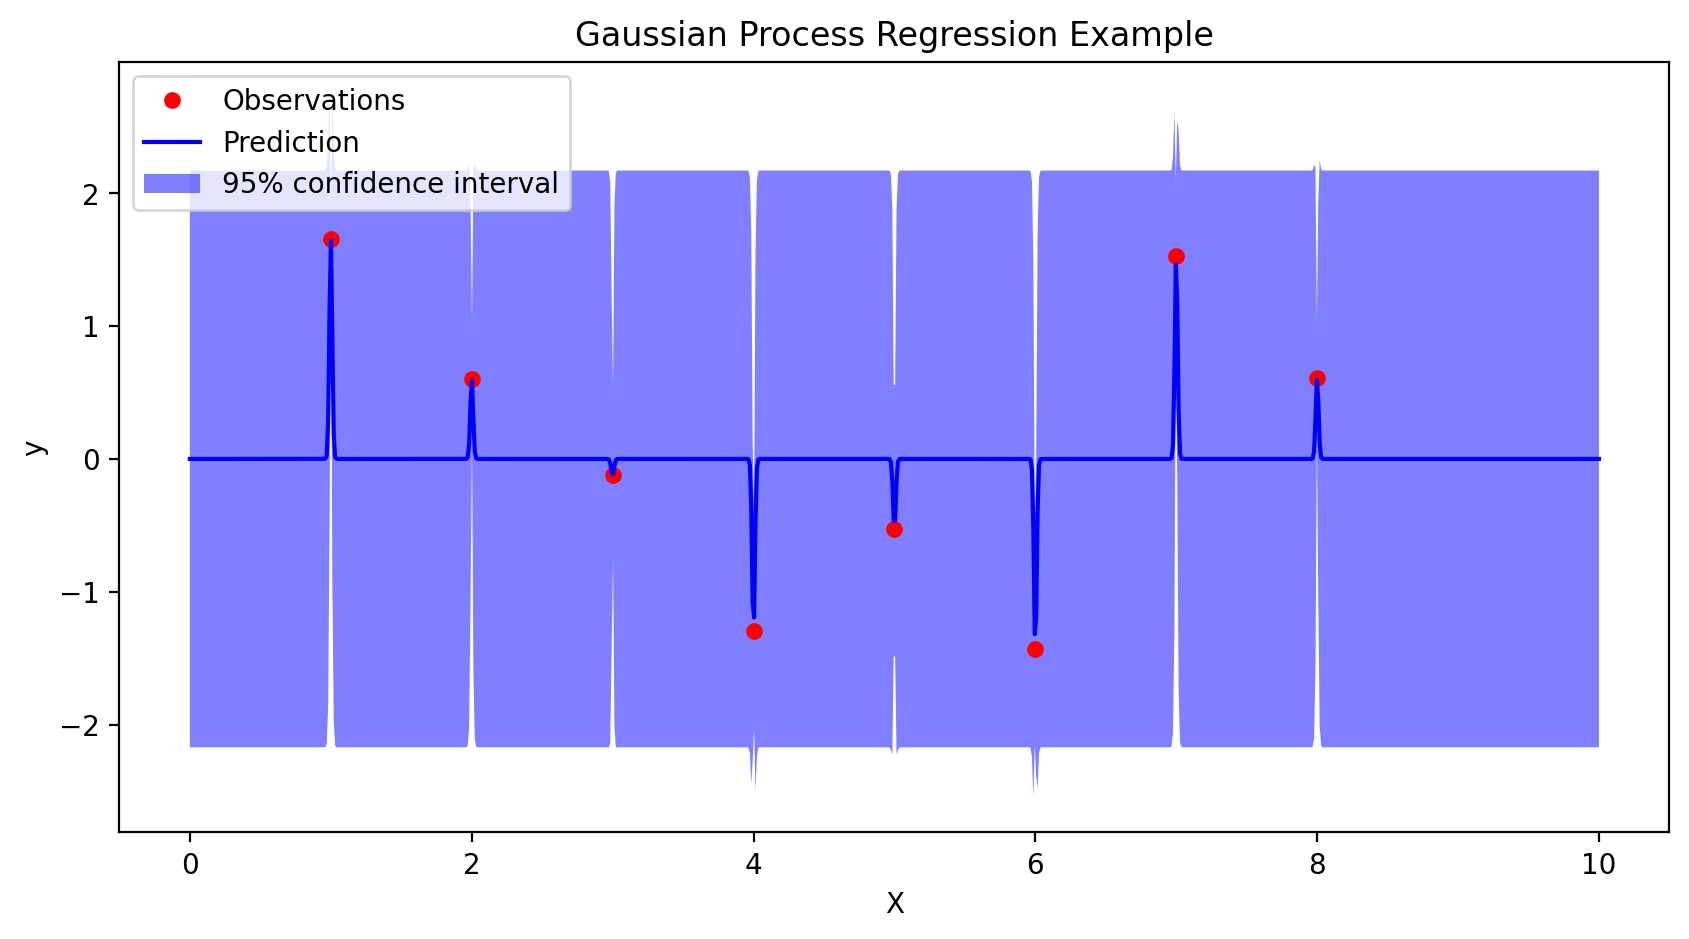

In [ ]:
# Generate some sample data
np.random.seed(1)
X = np.atleast_2d([1.,2, 3.,4., 5., 6., 7., 8.]).T
y = np.sin(X).ravel()

# Add some noise to the data
y += 0.5 * np.random.normal(size=y.shape)

# Define the kernel for the GP
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))  # Combine constant and RBF kernels

# Create a Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the GP to the data
gp.fit(X, y)

# Make predictions on a dense grid
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred- 1.9600 * sigma, (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.title("Gaussian Process Regression Example")
plt.show()

#### Example

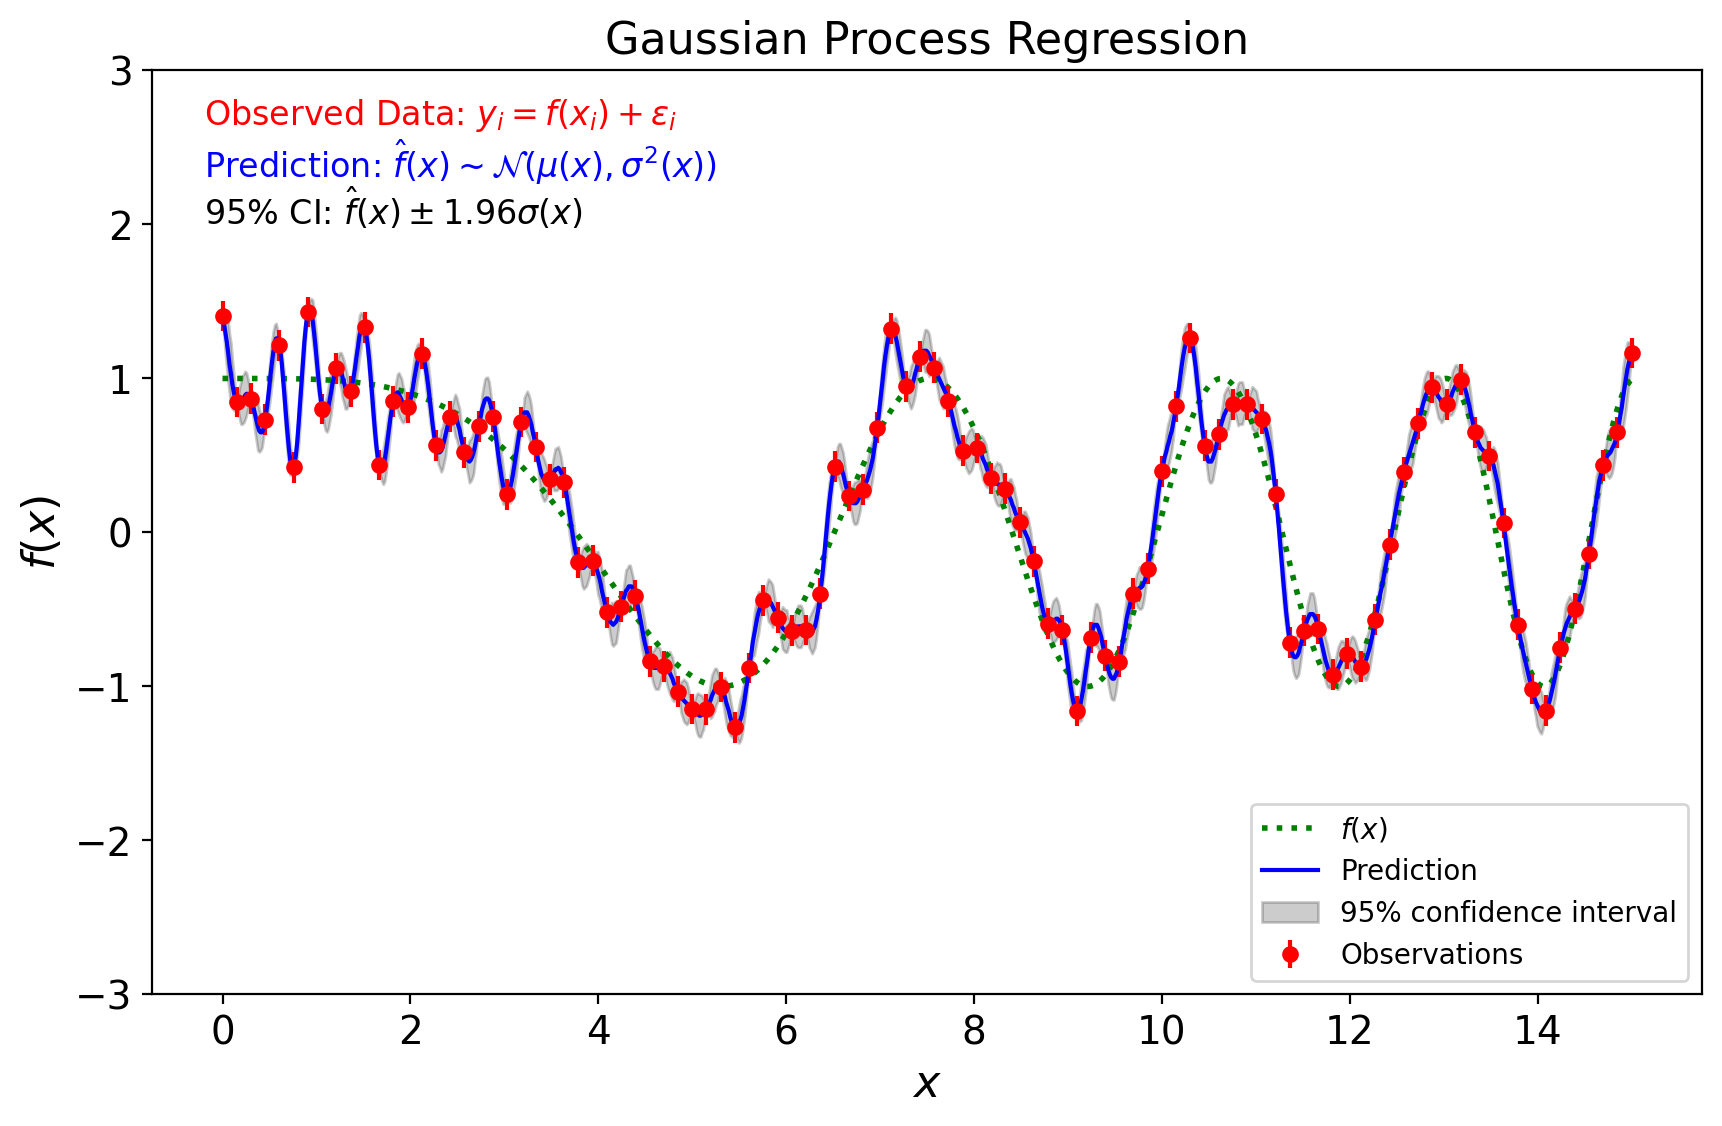

In [9]:
# Generating synthetic data
np.random.seed(1)
X = np.atleast_2d(np.linspace(0, 15, 100)).T

def f(x):
  return np.cos(-x**2/9.0)

y = f(X).ravel() + np.random.normal(0, 0.25, X.shape[0])

# Define the kernel: Constant * RBF
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create GaussianProcessRegressor object
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to the data
gp.fit(X, y)

# Make predictions
X_ = np.atleast_2d(np.linspace(0, 15, 1000)).T
y_pred, sigma = gp.predict(X_, return_std=True)

# Round values to two decimals
y_pred = np.round(y_pred, 2)
sigma = np.round(sigma, 2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X_, f(X_), 'g:', label=r'$f(x)$',lw=2)
plt.errorbar(X, y, 0.1, fmt='r.', markersize=10, label='Observations')
plt.plot(X_, y_pred, 'b-', label='Prediction')
plt.fill_between(X_[:, 0], y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='k', label='95% confidence interval')
plt.xlabel('$x$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('$f(x)$',fontsize=16)
plt.ylim(-3, 3)
plt.legend(loc='lower right')

# Add the equations as annotations
plt.annotate(r'Observed Data: $y_i = f(x_i) + \epsilon_i$', xy=(-0.2, 2.65), fontsize=12, color='red')
plt.annotate(r'Prediction: $\hat{f}(x) \sim \mathcal{N}(\mu(x), \sigma^2(x))$', xy=(-0.2, 2.3), fontsize=12, color='blue')
plt.annotate(r'95% CI: $\hat{f}(x) \pm 1.96\sigma(x)$', xy=(-0.2, 2), fontsize=12, color='black')
plt.title('Gaussian Process Regression', fontsize=16)
plt.savefig('gp.png',dpi=300,bbox_inches='tight')
plt.show()

### Classification with Gaussian Processes

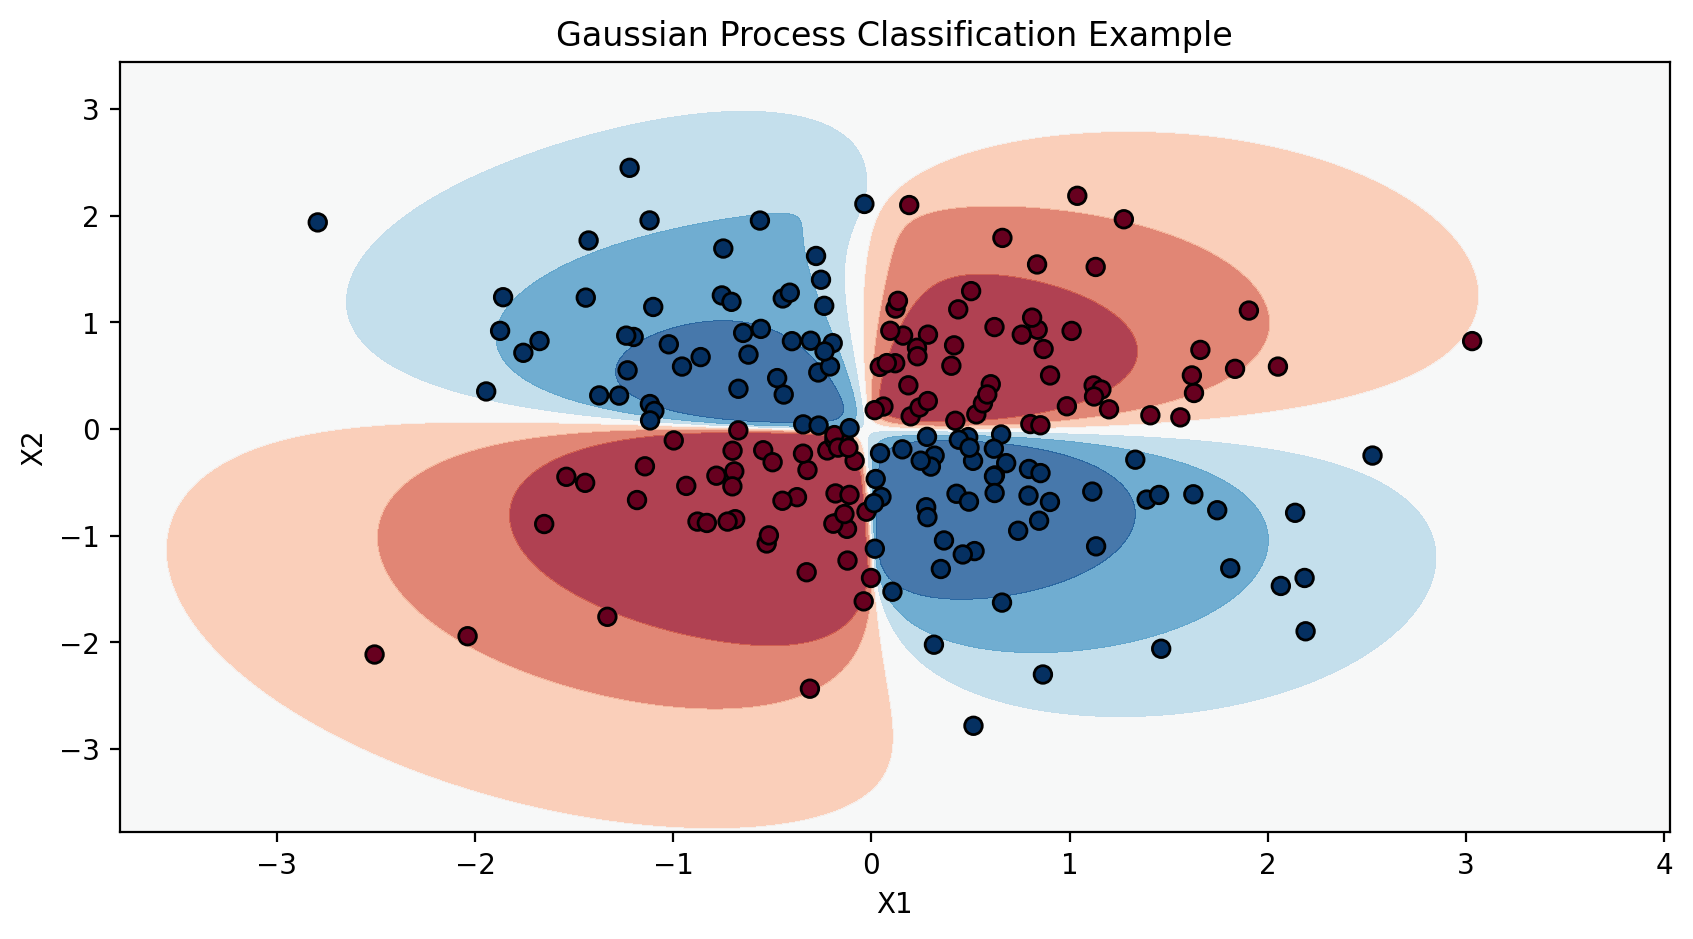

In [ ]:
# Generate some sample data for classification
np.random.seed(1)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Define the kernel for the GP
kernel = 1.0 * RBF([1.0, 1.0])

# Create a Gaussian Process Classifier
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)

# Fit the GP to the data
gpc.fit(X, y)

# Create a mesh to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class probabilities on the mesh
Z = gpc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the results
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', s=40)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Gaussian Process Classification Example")
plt.show()

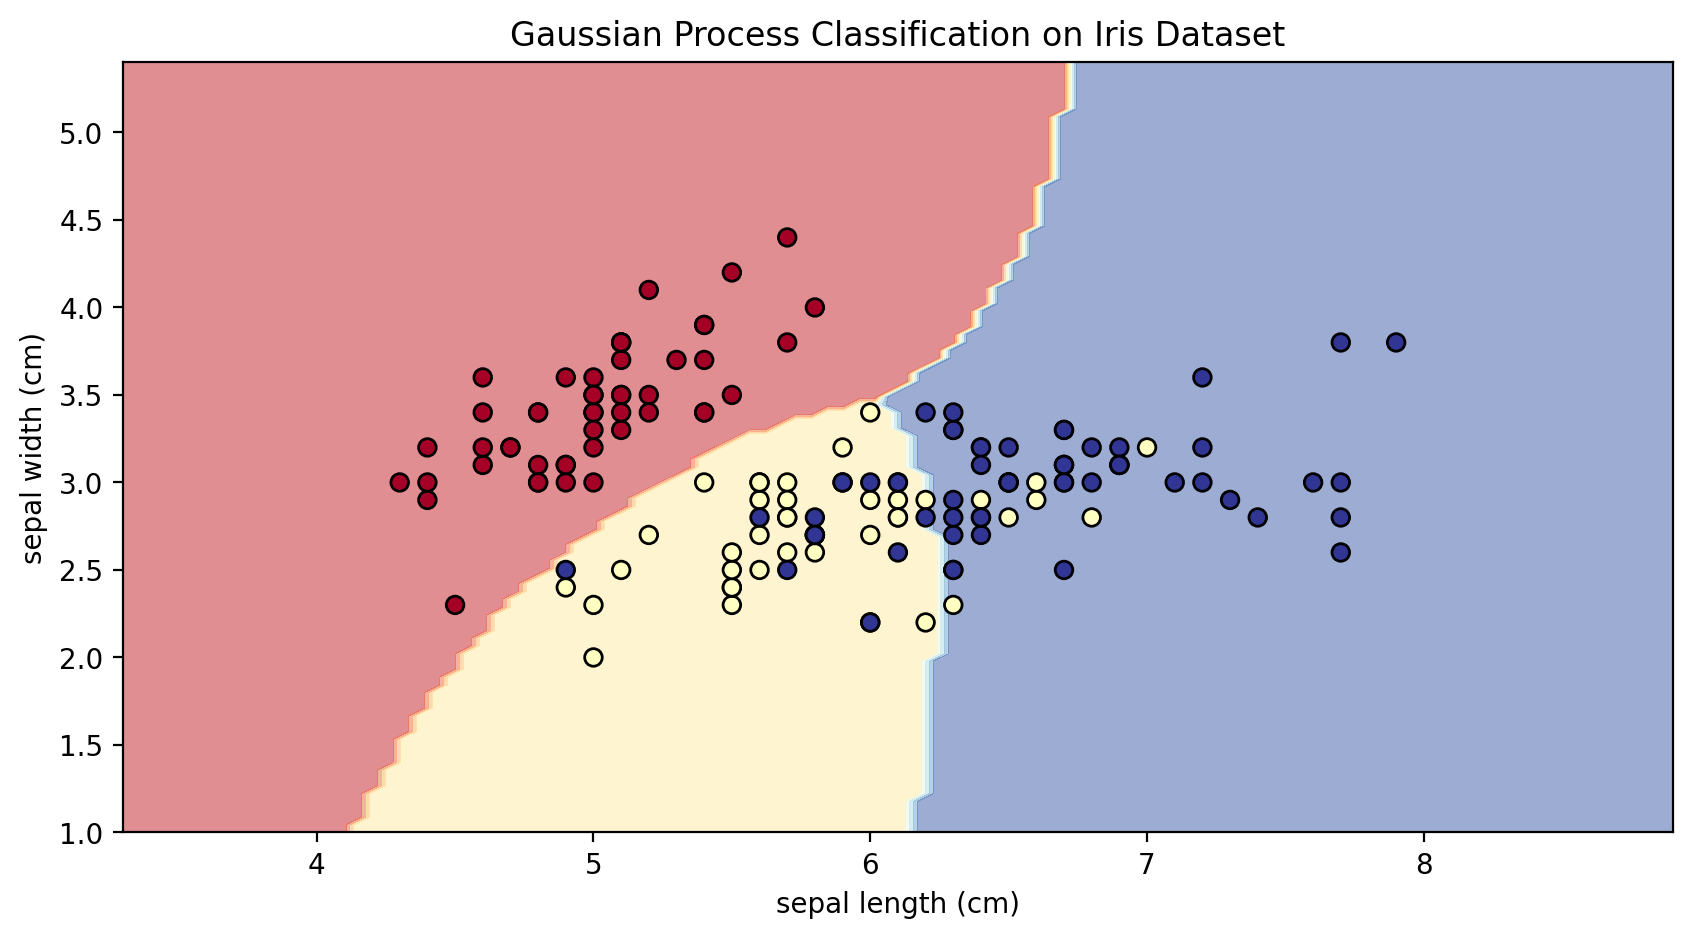

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization
y = iris.target

# Define the kernel for the GP
kernel = 1.0 * RBF([1.0, 1.0])  # You can experiment with different kernels

# Create a Gaussian Process Classifier
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)

# Fit the GP to the data
gpc.fit(X, y)

# Plot the decision boundary
_, ax = plt.subplots(figsize=(10, 5))
DecisionBoundaryDisplay.from_estimator(
    gpc,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    alpha = 0.5
)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="k", s=40)
plt.title("Gaussian Process Classification on Iris Dataset")
plt.show()